In [1]:
import pyusbus as usbProbe

print(usbProbe.__version__) 

In /home/kelu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/kelu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/kelu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/kelu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/kelu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_c

0.0.3


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
probe = usbProbe.Interson()

No Device


In [4]:
usbProbe.findProbe()

'Interson, programmed'

# Doing acqs

In [5]:
probe.StartRun()

Starting..


1

In [11]:
import time

In [33]:
probe.startMotor() 
probe.startAcq()
time.sleep(0.1)
probe.getUSBImages(n=5)
probe.stopAcq()
probe.stopMotor()

In [100]:
plt.figure(figsize=(15,10))
N = np.shape(probe.rawData)[0]*np.shape(probe.rawData)[1]
img = np.array(probe.rawData).reshape(N//2048, 2048)[:1000]
plt.imshow(img,aspect="auto",cmap="bone")
plt.title("20210525_interson-phantom")
plt.savefig("data/images/20210521/20210525_interson-phantom.jpg")

NameError: name 'probe' is not defined

<Figure size 1080x720 with 0 Axes>

In [35]:
np.savez("data/20210525_interson-phantom.npz",data=img)

# Checking the content of the image

In [3]:
img = np.load("data/20210525_interson-phantom.npz")["data"]

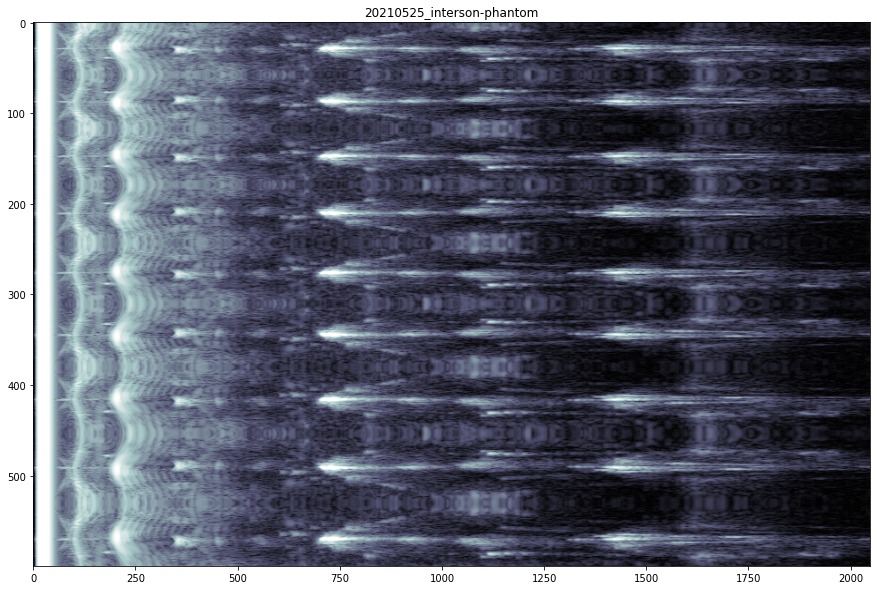

In [4]:
plt.figure(figsize=(15,10))
plt.imshow(img,aspect="auto",cmap="bone")
plt.title("20210525_interson-phantom")
plt.savefig("images/20210521/20210525_interson-phantom.jpg")

([1, 2, 118, 119, 244, 245, 372, 373, 381, 382, 509, 510, 531, 532],
 [243, 369, 370, 371, 506, 507, 508])

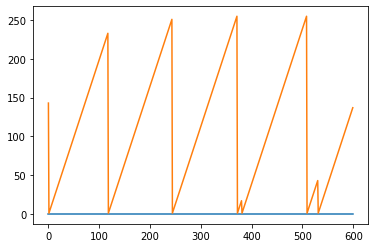

In [5]:
plt.plot(img.T[0])
plt.plot(img.T[1])
img.T[1][245]
[x for x in range(len(img)-1) if img.T[1][x] < 4],[x for x in range(len(img)-1) if img.T[1][x] > 250]

In [6]:
img.T[100][1]

167

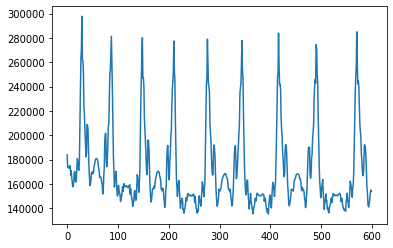

In [7]:
LBL = np.sum(img, axis=1)
plt.plot(LBL)
xx = [np.argmax(LBL[:100]),50+np.argmax(LBL[50:100]),
      100+np.argmax(LBL[100:160]),160+np.argmax(LBL[160:230]),
      230+np.argmax(LBL[230:300]),300+np.argmax(LBL[300:380]),
      380+np.argmax(LBL[380:450]),
      450+np.argmax(LBL[450:520]),520+np.argmax(LBL[520:]),
     ]
m = []
for i in range(len(xx)-1):
    m.append(xx[i]+(xx[i+1]-xx[i])//2)

In [8]:
m

[58, 117, 179, 243, 310, 380, 453, 530]

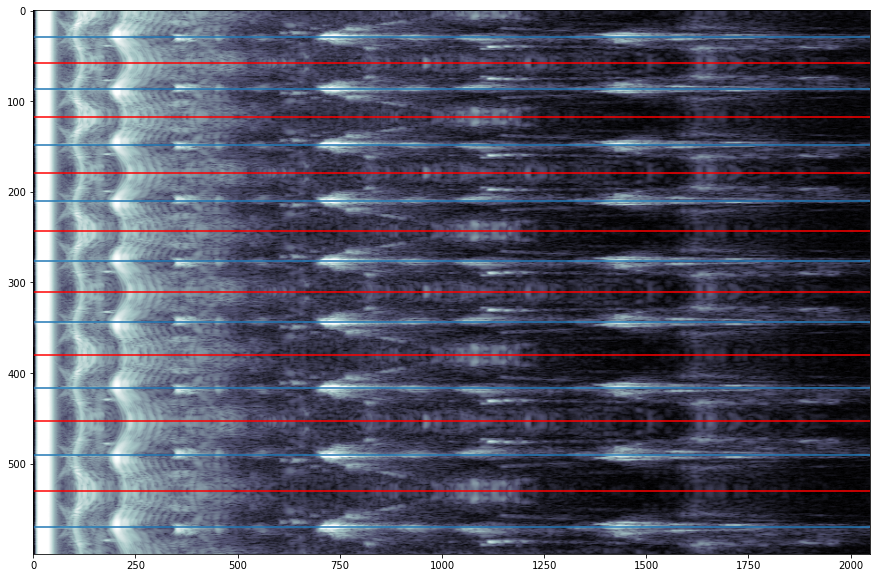

In [9]:
plt.figure(figsize=(15,10)) 
plt.imshow(img,aspect="auto",cmap="bone") 
imgs = []
for x in xx:
    plt.axhline(y=x) 
for x in range(len(m)-1):
    plt.axhline(y=m[x],c="r") 
    imgs.append(img[m[x]:m[x+1]])
plt.axhline(y=m[-1],c="r") 

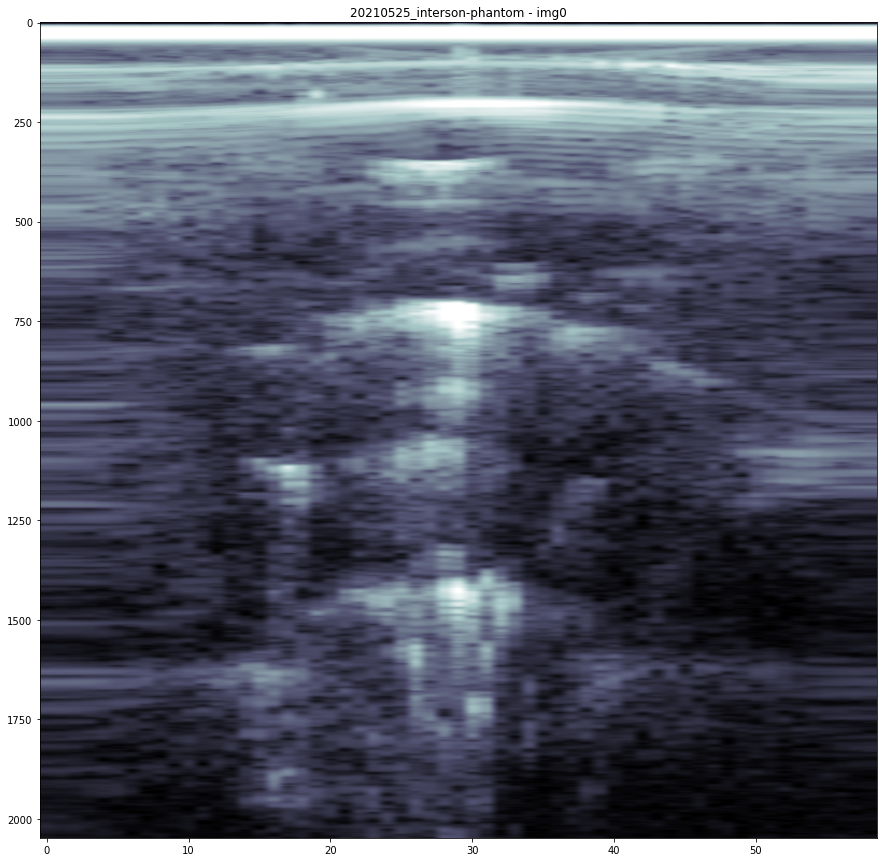

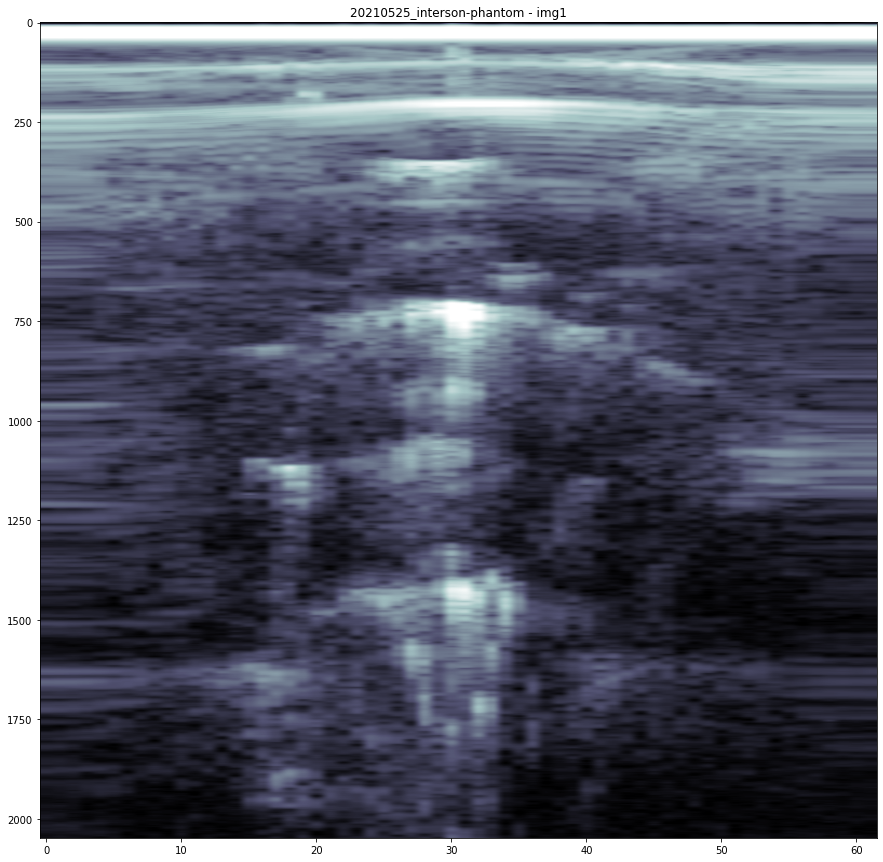

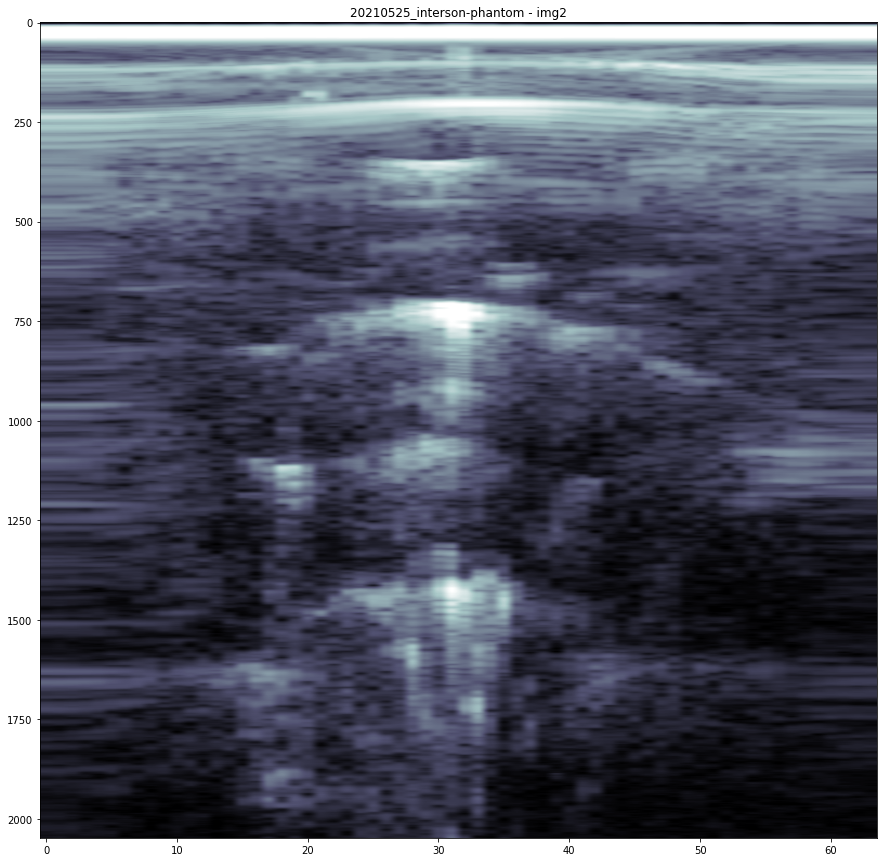

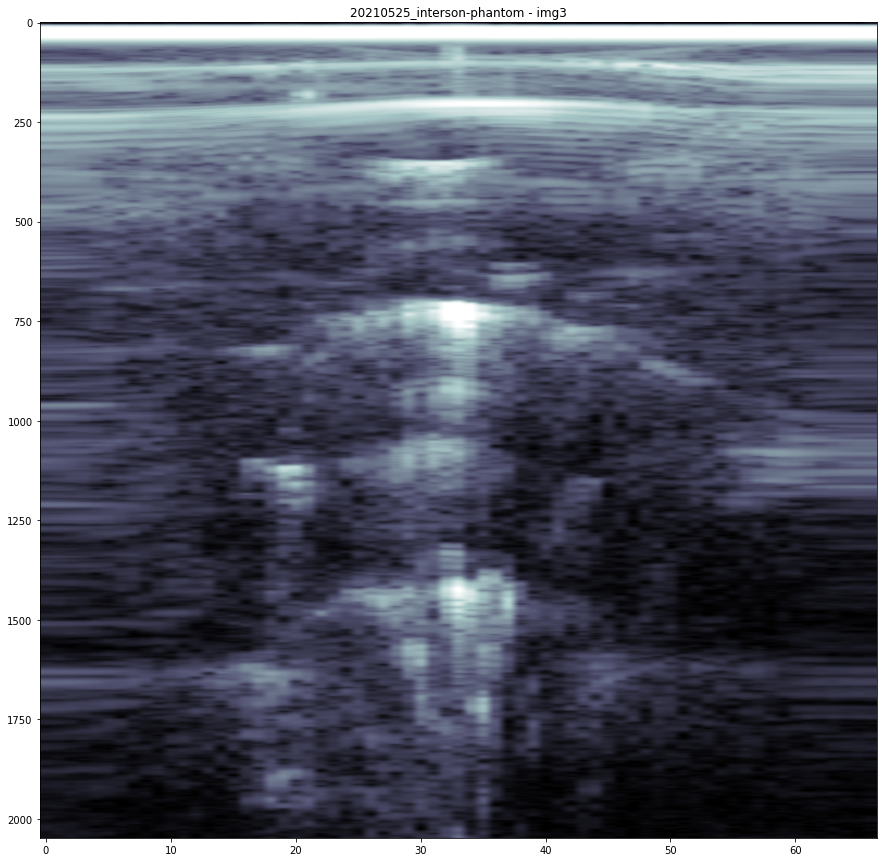

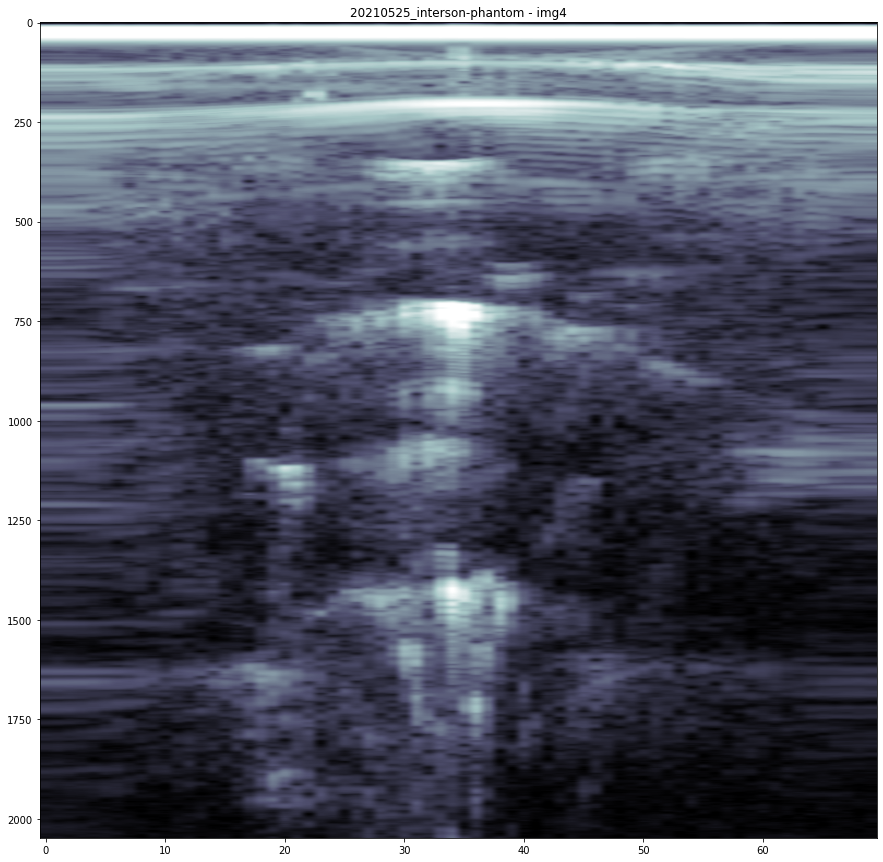

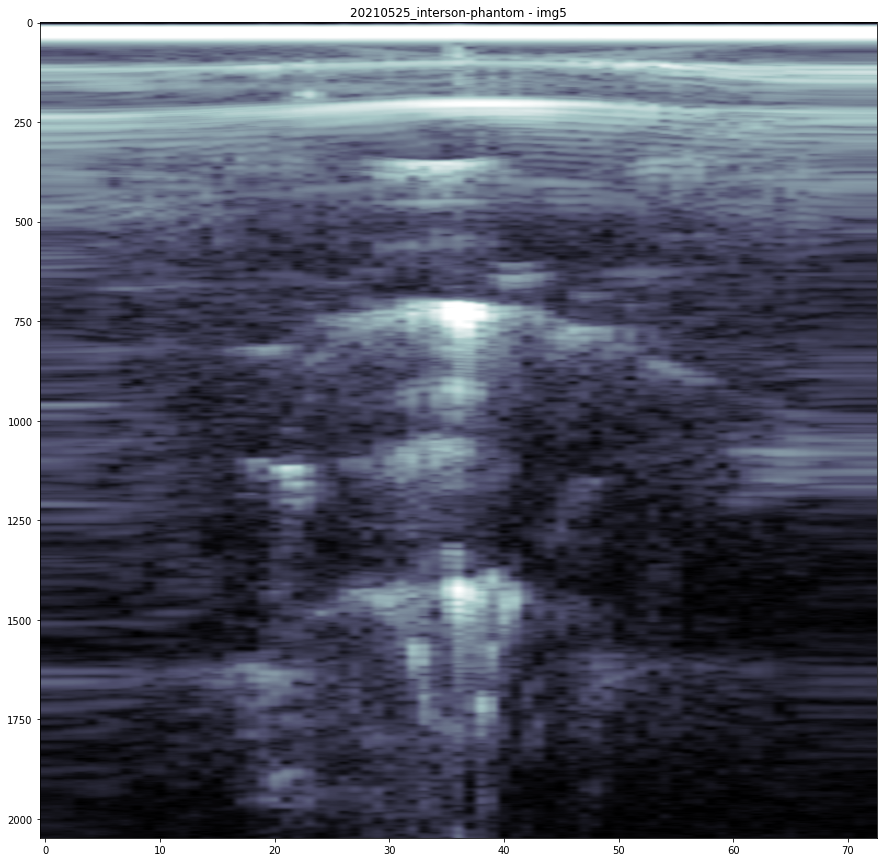

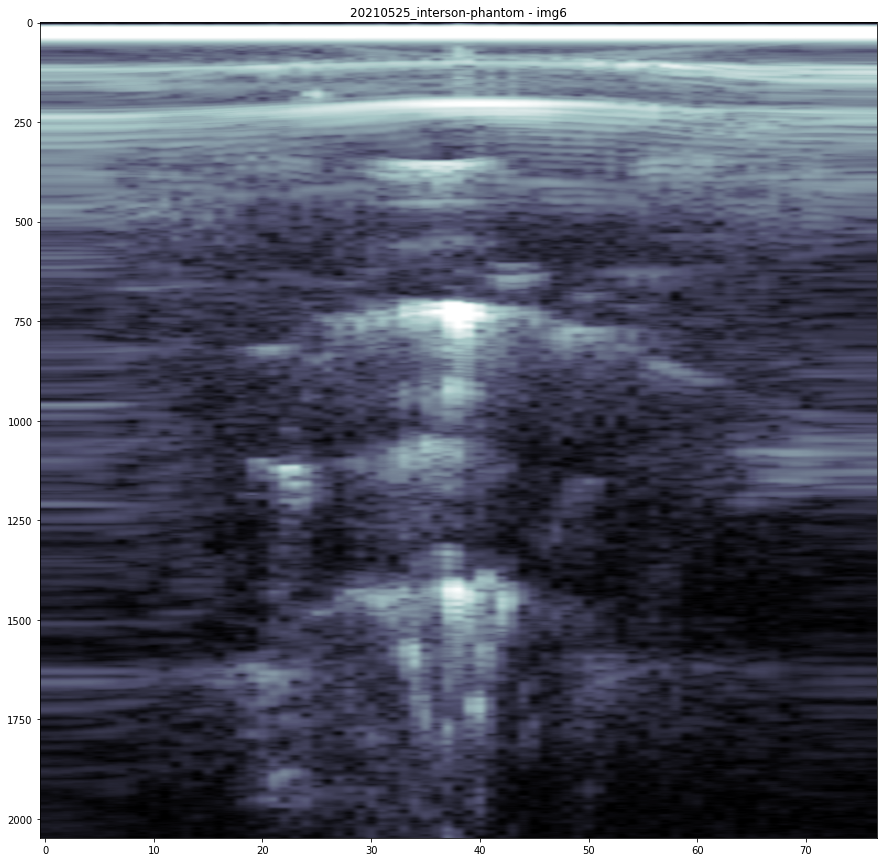

In [12]:
filenames = []
for k in range(len(imgs)):
    plt.figure(figsize=(15,15)) 
    if k%2:
        IMG = np.fliplr(imgs[k].T)
    else:
        IMG = imgs[k].T
    plt.imshow(IMG,aspect="auto",cmap="bone") 
    plt.title("20210525_interson-phantom - img"+str(k))
    FN = "images/20210521/20210525_image"+str(k)+".jpg"
    filenames.append(FN)
    plt.savefig(FN)

In [13]:
import imageio

with imageio.get_writer('images/20210521/loop.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

# The loop

![](images/20210521/loop.gif)